# Clustering Wines
## Clustering
---
### Overview
Clustering is a type of unsupervised learning that allows us to find groups of similar objects, objects that are more related to each other than to the objects in other groups. This is often used when we don't have access to the ground truth, in other words, the labels are missing.
Examples of this could be the grouping of documents based on their contents, or finding customers with similar interests based on their purchase behaviours.
### Different types of clustering algorithms
There are a huge number of clustering algorithms. In general, there are fours types:
- Centroid based models - each cluster is represented by a single mean vector (e.g., k-means)
- Connectivity based models - biult based on distance connectivity (e.g., hierarchical clustering)
- Distribution based models - biult using statistical distributions (e.g., Gaussian mixtures)
- Density based models - clusters are defined as dense areas (e.g., DBSCAN)

Refer to [document](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) for all types of clustering algorithms and their appropriateness for different types of data.

## Centroid-based Clustering
---
### K-means
K-means is one of the most popular clustering algorithms. Assuming there are _n_ data points, the algorithm works as follows:
- Step 1: initilasation - pick k random points as clustering centers, called centroids
- Step 2: cluster assignment - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters
- Step 3: centroid updating - for each new cluster, calculate its centroid by taking the average of all points assigned to that cluster
- Step 4: repeat step 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

_The algorithm has gained great popularity because it is easy to implement and scales well to large datasets. However, it is difficult to predict the number of clusters, it can get stuck in __local optimums__, and it can perform poorly when the clusters are of varying sizes and density._

### Distance metric
One way to calculate the distance is the __euclidean distance__. For example, the distance between points `x1 = (0, 1)` and `x2 = (2, 0)` is given by:

In [1]:
import numpy as np
x1 = np.array([0, 1])
x2 = np.array([2, 0])
np.sqrt(((x1 - x2)**2).sum())

2.23606797749979

which also applies to higher dimensions, e.g.,

In [2]:
x3 = np.array([0, 1, 3])
x4 = np.array([2, 0, 1])
np.sqrt(((x3 - x4)**2).sum())

3.0

## Wine Data
---
In this module, we analyse the result of a chemical analysis of wines grown in a particular region in Italy. The goal is to try to group similar observations together and determine the number of possible clusters. This would help us make predictions and reduce __dimensionality__.

In [3]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


The analysis reported the quantities: alcohol, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, od280/od315 of diluted wines, and proline.There are 13 features for each wine. If we were to group these wines into three groups, we will reduce dimension from 13 to 3. More specifically, we can represent each of our data points in terms of its distance to each of the three cluster centres. 

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

The analysis reported the quantities of 13 constituents from 178 entries of wines: alcohol, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, od280/od315 of diluted wines, and proline. There are no missing values.

To show the basic statistics of first several features:

In [5]:
wine.iloc[:, :5].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573
std,0.811827,1.117146,0.274344,3.339564,14.282484
min,11.030000,0.740000,1.360000,10.600000,70.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000


The attributes are not on the same scale, so we will have to scale the data later.

### Plotting the data
The summary statistics provide some digital information, while visualisation offers a more direct view showing the distribution of and the relationship between features.
In classification, `scatter_matrix` is introduced to show these plots.

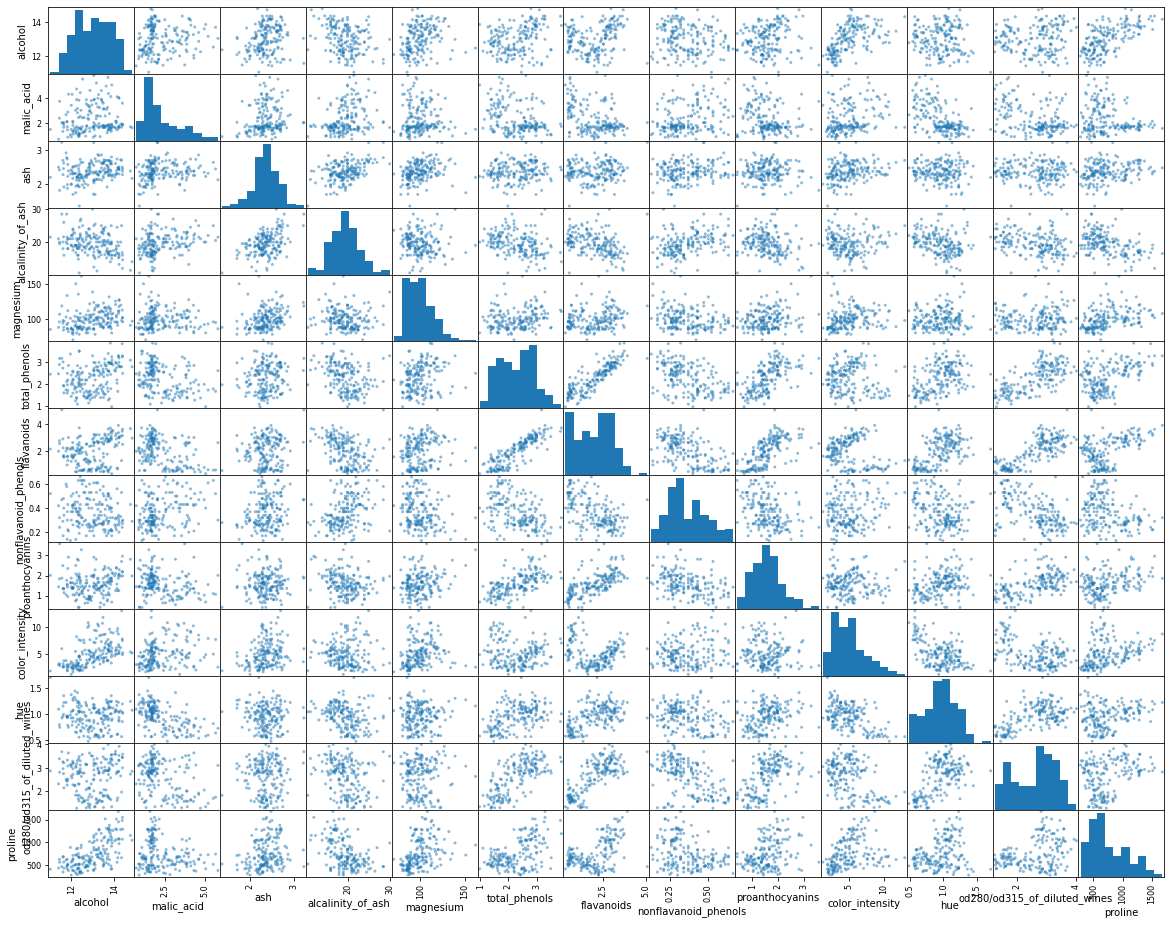

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(wine, figsize=(20, 16))
plt.show()

After examining all features, pick two features to better illustrate the clustering algorithm: alcohol and total_phenols.

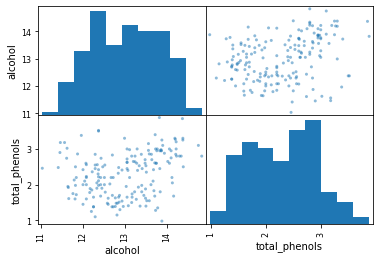

In [7]:
scatter_matrix(wine.iloc[:, [0, 5]])
plt.show()

We do not know the ground truth, so we can only make an educated guess from the graph above that there are roughly three subgroups. 

_No matter if it is supervised or unsupervised learning, **exploratory data analysis** (EDA) is always essential before one dives into modeling._

### Pre-processing: standardisation
Alcohol and total_phenols are picked for the demonstration of this algorithm.

In [8]:
X = wine[['alcohol', 'total_phenols']]

Unlike supervised learning models, in general, unsupervised ones do not require to split data into training and testing sets since there is no ground truth to validate the model. However, centroid-based algorithms require one pre-processing step, that is to standardise the data, because k-means works better on data where each attributes is of similar scales. Mathematically,

_z = (x - mean) / std_

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
print('mean', scale.mean_, 'std', scale.scale_)

mean [13.00061798  2.29511236] std [0.80954291 0.62409056]


In [10]:
X_scaled = scale.transform(X)  # result is numpy.array
X_scaled[:5]

array([[1.51861254, 0.80899739],
       [0.24628963, 0.56864766],
       [0.19687903, 0.80899739],
       [1.69154964, 2.49144552],
       [0.29570023, 0.80899739]])

To visually comprehend the result of the transformation,

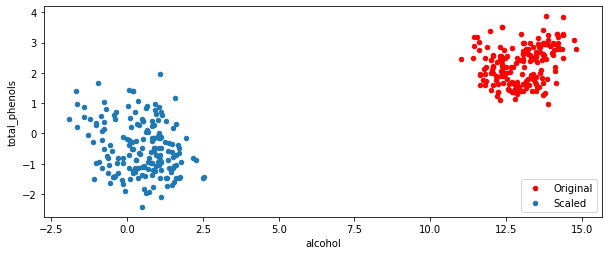

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
X.plot.scatter(x='alcohol', y='total_phenols',
               ax=ax,
               color='red',
               label='Original')
ax.scatter(*X_scaled.reshape(2, -1),
           s=20,
           label='Scaled')
ax.legend(loc='lower right')
ax.set_aspect('equal')
plt.show()

In [12]:
print('scaled mean', X_scaled.mean(axis=0))
print('scaled std', X_scaled.std(axis=0))

scaled mean [ 7.84141790e-15 -1.95536471e-16]
scaled std [1. 1.]


The scaled features have a mean of about 0 and a standard deviation of 1, which means they are of roughly the same scale.

## Modeling
---
### K-means modeling
We only focus on the number of clusters and leave all other parameters default.

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int32)

In [14]:
np.vstack(np.unique(y_pred, return_counts=True))

array([[ 0,  1,  2],
       [54, 65, 59]])

There are 60, 65 and 53 numbers of elements in the three clusters.

To inspect the coordinates of the three cluster centres,

In [15]:
kmeans.cluster_centers_

array([[ 0.05253603, -1.14020926],
       [ 0.92017418,  0.87087204],
       [-1.06183503,  0.08414606]])

A better way to see the results is to visualise them,

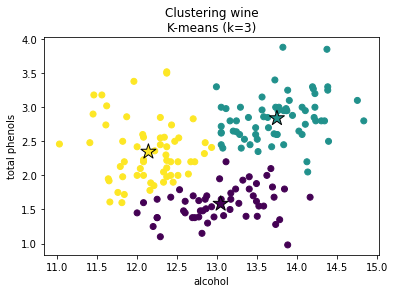

In [20]:
plt.scatter(X.iloc[:, 0],
            X.iloc[:, 1],
            c=y_pred)
real_cluster_centers = scale.inverse_transform(kmeans.cluster_centers_)
plt.scatter(real_cluster_centers[:, 0],
            real_cluster_centers[:, 1],
            marker='*',
            s = 250,
            c = [0, 1, 2],
            edgecolors='k')
plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('Clustering wine\nK-means (k=3)')
plt.show()

The stars are __centroids__. K-means divides wines into three groups:
- low alcohol but high total phenols (upper right in green)
- high alcohol and high total phenols (upper left in yellow)
- low total phenols (lower in purple)

### Predicting
For any new wine with its chemical report on alcohol and total phenols, we can now classify it based on its distance to each of the centroids. Suppose there is a new wine with alcohol at 13 and total phenols at 2.5,

In [21]:
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
kmeans.predict(X_new_scaled)

array([1], dtype=int32)

Plot the new data point on graph,

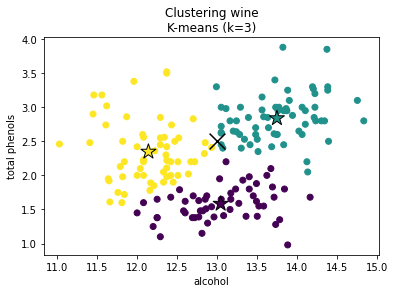

In [30]:
plt.scatter(X.iloc[:, 0],
            X.iloc[:, 1],
            c=y_pred)
real_cluster_centers = scale.inverse_transform(kmeans.cluster_centers_)
plt.scatter(real_cluster_centers[:, 0],
            real_cluster_centers[:, 1],
            marker='*',
            s = 250,
            c = [0, 1, 2],
            edgecolors='k')
plt.scatter(X_new[:, 0],
            X_new[:, 1],
            marker='x',
            s=250,
            color='k')
plt.xlabel('alcohol')
plt.ylabel('total phenols')
plt.title('Clustering wine\nK-means (k=3)')
plt.show()

_One major shortcoming of k-means is that the random initial guess for the centroids can result in bad clustering, and k-means++ algorithm addresses this obstacle by specifying a procedure to initialize the centroids before proceeding with the standard k-means algorithm. In scikit-learn, the initialization mechanism is set to k-means++, by default._

### Optimal k: the Elbow method
Divide the wines into two subgroups,

In [42]:
def clustering_wines(k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    y_pred_kn = kmeans.predict(X_scaled)
    y_pred_kn
    plt.scatter(X.iloc[:, 0],
                X.iloc[:, 1],
                c=y_pred_kn)
    real_cluster_centers = scale.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(real_cluster_centers[:, 0],
                real_cluster_centers[:, 1],
                marker='*',
                s = 250,
                c = range(kmeans.n_clusters),
                edgecolors='k')
    plt.xlabel('alcohol')
    plt.ylabel('total phenols')
    plt.title('Clustering wine\nK-means (k={})'.format(k))
    plt.show()

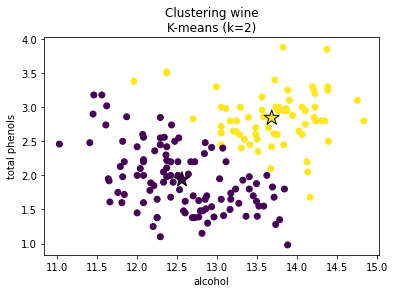

In [43]:
clustering_wines(2)

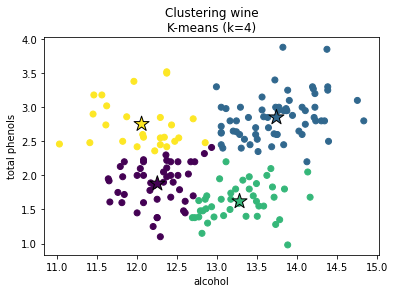

In [44]:
clustering_wines(4)